 ## Лабораторная работа 2

# Вариационные методы решения краевых задач.

## Задание:

### Методами коллокаций, интегральным и дискретным методами наименьших квадратов и Галеркина получить численное решение краевой задачи:

### 1. $y'' + (1 + x^2) \cdot y = -1, $  

  $-1 \leq x \leq 1$
  
  
### 2. $a\cdot y'' + (1 + b\cdot x^2)\cdot y = -1,$

   $-1 \leq x \leq 1$,
   
   $a = sin(k), b = cos(k)$.


### Краевые условия для обеих задач:

$y(-1) = 0$

$y(1) = 0$

### 1. Решение краевых задач вариационными методами.

Приближенное решение краевой задачи можно получить в виде линейной комбинации базисных функций:

$y_n(x) = a_0 \cdot \varphi_0(x) + a_1\cdot \varphi_1(x) + ... + a_n \cdot \varphi_n(x)$

Базисная функция имеет следующий вид:

$\varphi_i(x) = x^i \cdot (1 - x^2)$

Таким образом, для нахождения решения необходимо найти коэффициенты $a$ такие, чтобы функция $y_n(x)$ удовлетворяла граничному условию и была максимально близко к точному решению, для чего используется невязка функции.

Невязка функции имеет следующий вид:

$\psi(x, a_1, ..., a_n) = y''_n(x) + p(x)  \cdot y'_n(x) + q(x) \cdot y_n(x) - f(x) $

Очевидно, она должна быть минимальной для максимального приближения к точному решению краевой задачи.

Представим $y_n(x), y'_n(x), y''_n(x)$ как линейные комбинации базисных функций:

$y_n(x) = a_0 \cdot \varphi_0(x) + a_1\cdot \varphi_1(x) + ... + a_n \cdot \varphi_n(x) = \sum_{i=0}^n a_i \cdot x^i(1 - x^2) = \sum_{i=0}^n a_i \cdot (x^i - x^{i+2}) $

$y'_n(x) =  \sum_{i=1}^n a_i \cdot (i \cdot x^{i-1} - (i+2) \cdot x^{i+1}) - 2 \cdot x \cdot a_0$

$y''_n(x) =  \sum_{i=2}^n a_i \cdot (i \cdot (i-1) \cdot x^{i-2} - (i+2)\cdot (i+1) \cdot x^i) - 2 \cdot a_0 - 6\cdot a_1 \cdot x $

 Следовательно, коэффициенты при $a_i$  можно записать так:
 $coefficient_i = \begin{cases} -2 - p(x) \cdot 2 \cdot x + q(x) \cdot (1 - x^2), & \mbox{if } i = 0  \\ -6\cdot x + p(x)\cdot (1 - 3\cdot x^2) + q(x) \cdot (x - x^3), & \mbox{if } i = 1 \\ i\cdot (i-1)\cdot x^{i-2} - (i+2)\cdot (i+1) \cdot x^i + p(x) \cdot (i\cdot x^{i-1} - (i+2)\cdot (i+2)\cdot x^{i+1})+ q(x) \cdot (x^i - x^{i+2}), & \mbox{if } i \geq 2\end{cases}$

### 2. Задание граничных условий и параметра k.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [3]:
x_a = -1  # крайние точки интервала
x_b = 1
k = 2  # номер варианта
m = 100  # количество точек коллокации

f = lambda a=1: -1 / a
q = lambda x, a=1, b=1: 1 + b * (x ** 2) / a
fi_i = lambda x, i, a=1, b=1: x ** i * (1 - x ** 2)

### 3. Задание функции для определения коэффициента при $a_i$:

In [4]:
def coefficient(x, i, a, b):
    if i == 0:
        return - 2 + q(x, a, b) * fi_i(x, i)
    if i == 1:
        return -6 * x + q(x, a, b) * fi_i(x, i)
    else:
        return (i - 1) * i * x ** (i - 2) - (i + 1) * (i + 2) * x ** i + q(x, a, b) * fi_i(x, i)

### 4. Задание функции для нахождения значений $a_i$ решения системы и  вычисления  $y$ и изображения графика:

In [5]:
def solve(X, A):
    Y = [sum(A[i] * fi_i(x, i) for i in range(m)) for x in X]
    plt.plot(X, Y)
    plt.show()
    print("max Y = ", max(Y))


def integral_solve(x, func1, func2, i, j, a: float = 1, b: float = 1):
    h = (x_b - x_a) / m
    return h * sum(func1(x[num], i, a, b) * func2(x[num], j, a, b) for num in range(m))

## 1. Метод коллокаций

#### В рамках метода коллокаций выполняются следующие действия:
1. На отрезке $[a, b]$ выбираются точки $x_1, x_2, ... , x_m \in [a, b]$,  $(m \geq n)$ - точки коллокации. 
2. Точки последовательно подставляются в невязку, и, считая, что невязка должна быть нулю в точках коллокации, получаем систему уравнений для определения коэффициентов $a_1, ... , a_n$:

    $\begin{cases} \psi(x_1, a_0, ... , a_n) = 0 \\ .....\\ \psi(x_n, a_0, ... , a_n) = 0\end{cases}$
    
    При этом в первом пункте было показано, что:
    
    $\psi(x, a_0, ... , a_n) =
a_0 \cdot (-2 - p(x) \cdot 2 \cdot x + q(x) \cdot (1 - x^2)) + a_1 \cdot (-6\cdot x + p(x)\cdot (1 - 3\cdot x^2) + q(x) \cdot (x - x^3)) + \sum_{i=2}^n a_i  \cdot (i\cdot (i-1)\cdot x^{i-2} - (i+2)\cdot (i+1) \cdot x^i + p(x) \cdot (i\cdot x^{i-1} - (i+2)\cdot (i+2)\cdot x^{i+1})+ q(x) \cdot (x^i - x^{i+2})) - f(x) $


    Тогда система принимает вид: 
    
   $\begin{cases}\ a_0 \cdot (-2 - p(x_1) \cdot 2 \cdot x_1 + q(x_1) \cdot (1 - x_1^2)) + a_1 \cdot (-6\cdot x_1 + p(x_1)\cdot (1 - 3\cdot x_1^2) + q(x_1) \cdot (x_1 - x_1^3)) + \sum_{i=2}^n a_i  \cdot (i\cdot (i-1)\cdot x_1^{i-2} - (i+2)\cdot (i+1) \cdot x_1^i + p(x_1) \cdot (i\cdot x_1^{i-1} - (i+2)\cdot (i+2)\cdot x_1^{i+1})+ q(x_1) \cdot (x_1^i - x_1^{i+2})) = f(x_1) \\ ................................................\\ a_0 \cdot (-2 - p(x_n) \cdot 2 \cdot x_n + q(x_n) \cdot (1 - x_n^2)) + a_1 \cdot (-6\cdot x_n + p(x_n)\cdot (1 - 3\cdot x_n^2) + q(x_n) \cdot (x_n - x_n^3)) + \sum_{i=2}^n a_i  \cdot (i\cdot (i-1)\cdot x_n^{i-2} - (i+2)\cdot (i+1) \cdot x_n^i + p(x_n) \cdot (i\cdot x_n^{i-1} - (i+2)\cdot (i+2)\cdot x_n^{i+1})+ q(x_n) \cdot (x_n^i - x_n^{i+2})) = f(x_n)\end{cases}$
 
 
3. Находим решение полученной системы уравнений, что позволяет найти и y.

In [8]:
def collocations(a: float = 1, b: float = 1):
    x = np.linspace(x_a, x_b, m)
    matrix = np.zeros((m, m))
    vector = np.linspace(f(a), f(a), m)

    for i in range(m):
        for j in range(m):
            matrix[i][j] = coefficient(x[i], j, a, b)

    result = np.linalg.solve(matrix, vector)
    solve(x, result)

## 2. Метод наименьших квадратов (интегральный)

Приближенное решение также строится по базисной системе. 

Для нахождения коэффициентов при базисных функций минимизируется интеграл от квадрата невязки:

$I = \int_{a}^{b} \psi^2(x, a_0, a_1, ... , a_n) dx$

Для нахождения минимума интеграла вычисляются первые производные интеграла по параметрам и приравниваются нулю, в результате чего получается система следующего вида, в результате решения которой будут получены значения коэффициентов: 

 $\begin{cases} \dfrac {\partial I}{\partial a_1} = 2 \cdot \int_{a}^{b} \psi(x, a_0, ..., a_n) \cdot \dfrac {\partial \psi(x, a_0, ..., a_n)}{\partial a_1} \\ ..........  \\ \dfrac {\partial I}{\partial a_n} = 2 \cdot \int_{a}^{b} \psi(x, a_0, ..., a_n) \cdot \dfrac {\partial \psi(x, a_0, ..., a_n)}{\partial a_n}\end{cases}$
 
Для того, чтобы интеграл был минимальным, для всех $i = 0, ..., n$ выполняется равенство:

$\dfrac {\partial I}{\partial a_i} = 0$

Можно заметить, что $\dfrac {\partial \psi(x, a_0, ..., a_n)}{\partial a_i} = coefficient_i(x)$ (в соответствии с формулами, выведенными в пункте 1).

Распишем уравнение системы для некоторого $a_i$, то есть рассмотрим i-ю строку системы:

$2 \cdot \int_{a}^{b} \psi(x, a_0, ..., a_n) \cdot \dfrac {\partial \psi(x, a_0, ..., a_n)}{\partial a_i} = 0$


In [9]:
def integral_least_square(a: float = 1, b: float = 1):
    x = np.linspace(x_a, x_b, m)
    matrix = np.zeros((m, m))

    for i in range(m):
        for j in range(m):
            matrix[i][j] = integral_solve(x, coefficient, coefficient, i, j, a, b)

    h = (x_b - x_a) / m
    vector = [h * sum(f(a) * coefficient(x[num], i, a, b) for num in range(m)) for i in range(m)]
    result = np.linalg.solve(matrix, vector)
    solve(x, result)

## 3. Метод наименьших квадратов (дискретный)

Выбирается m > n точек и решается следующая задача: 

$S = \sum_{i=1}^m \psi^2(x_i, a_1, ..., a_n) \to min$.

Для этого строится система:

$\begin{cases} \dfrac {\partial S}{\partial a_1} = 0 \\..... \\ \dfrac {\partial S}{\partial a_n} = 0\end{cases}$

Если подставить в систему $S = \sum_{i=1}^m \psi^2(x_i, a_1, ..., a_n)$, получаем:

$\begin{cases} \dfrac {\partial \sum_{i=1}^m \psi^2(x_i, a_1, ..., a_n)}{\partial a_1} = 0 \\..... \\ \dfrac {\partial \sum_{i=1}^m \psi^2(x_i, a_1, ..., a_n)}{\partial a_n} = 0\end{cases}$

$\begin{cases} 2 \cdot \sum_{i=1}^m  \psi(x_i, a_1, ..., a_n) \cdot \dfrac {\partial \psi(x_i, a_1, ..., a_n)}{\partial a_1} = 0 \\..... \\ 2 \cdot \sum_{i=1}^m \psi(x_i, a_1, ..., a_n) \cdot \dfrac {\partial \psi(x_i, a_1, ..., a_n)}{\partial a_n} = 0\end{cases}$

In [10]:
def discrete_least_square(a: float = 1, b: float = 1):
    x = np.linspace(x_a, x_b, m)
    matrix = np.zeros((m, m))
    vector = [sum(f(a) * coefficient(x[j], i, a, b) for j in range(m)) for i in range(m)]

    for i in range(m):
        for j in range(m):
            matrix[i][j] = sum(coefficient(x[num], i, a, b) * coefficient(x[num], j, a, b) for num in range(m))

    result = np.linalg.solve(matrix, vector)
    solve(x, result)

## 4. Метод Галеркина

При рассмотрении невязки $\psi(x, a_1, ..., a_n)$ строится система для определения коэффициентов при базисных функциях:

$\begin{cases} \int_{a}^{b} \psi(x, a_0, ..., a_n) \cdot \varphi_1(x) dx = 0  \\ ..........  \\ \int_{a}^{b} \psi(x, a_0, ..., a_n) \cdot \varphi_n(x) dx = 0 \end{cases}$


Учитывая полученное в первом пункте выражение для $\psi(x_i, a_1, ..., a_n)$:

In [12]:
def galerkin(a: float = 1, b: float = 1):
    x = np.linspace(x_a, x_b, m)
    matrix = np.zeros((m, m))
    for i in range(m):
        for j in range(m):
            matrix[i][j] = integral_solve(x, fi_i, coefficient, i, j, a, b)

    h = (x_b - x_a) / m
    vector = [h * sum(f(a) * fi_i(x[num], i) for num in range(m)) for i in range(m)]
    result = np.linalg.solve(matrix, vector)
    solve(x, result)

## 5. Выполнение задач

### Метод коллокаций

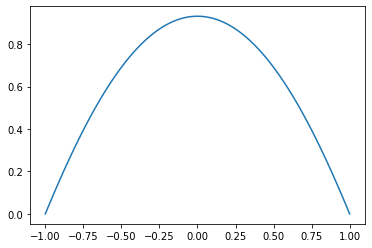

max Y =  0.9319551542437602


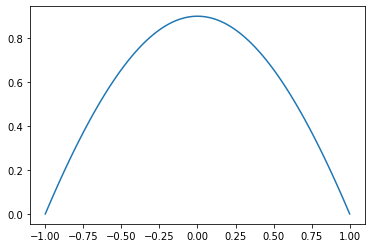

max Y =  0.90025885589878


In [14]:
    collocations()
    collocations(math.sin(k), math.cos(k))

### Метод наименьших квадратов (интегральный)

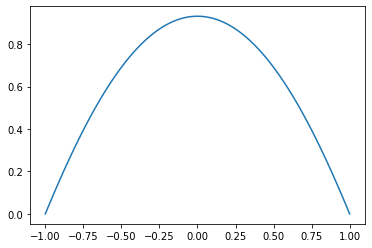

max Y =  0.9319551965330356


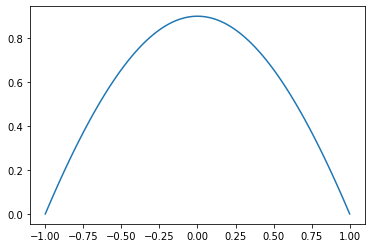

max Y =  0.9002588732076477


In [15]:
    integral_least_square()
    integral_least_square(math.sin(k), math.cos(k))

### Метод наименьших квадратов (дискретный)

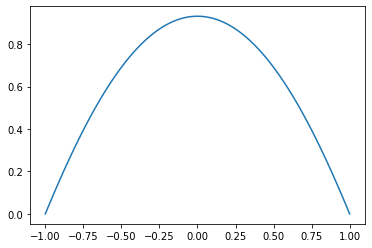

max Y =  0.9319551449297481


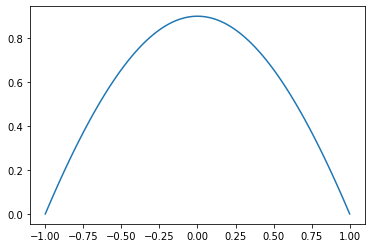

max Y =  0.9002588553519413


In [16]:
    discrete_least_square()
    discrete_least_square(math.sin(k), math.cos(k))

### Метод Галеркина 

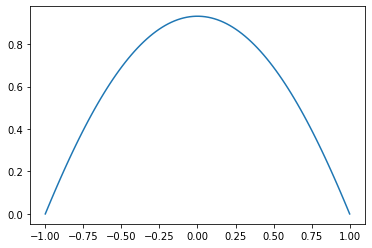

max Y =  0.931945300758069


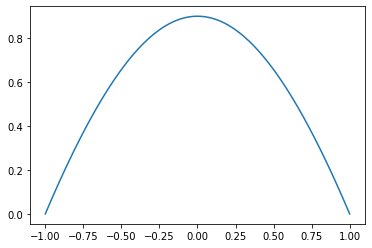

max Y =  0.9001991047924748


In [17]:
    galerkin()
    galerkin(math.sin(k), math.cos(k))